## Seleccion de caracteristicas

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Carga el dataset procesado
df = pd.read_csv('Base_procesado.csv')

# Asumiendo que df_processed es tu dataframe limpio
X = df.drop('fraud_bool', axis=1)
y = df['fraud_bool']

# IMPORTANTE: Divide tus datos ANTES de cualquier otro paso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escala los datos (después de dividir)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Entrena el modelo Lasso (C pequeño = regularización fuerte)
lasso_model = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', class_weight='balanced')
lasso_model.fit(X_train_scaled, y_train)

# Muestra las características que NO fueron eliminadas
important_features = X.columns[lasso_model.coef_[0] != 0]
print("Características seleccionadas por Lasso:", important_features)

Características seleccionadas por Lasso: Index(['income', 'name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'intended_balcon_amount', 'zip_count_4w', 'velocity_4w',
       'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
       'credit_risk_score', 'email_is_free', 'phone_home_valid',
       'phone_mobile_valid', 'bank_months_count', 'has_other_cards',
       'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes',
       'keep_alive_session', 'device_distinct_emails_8w', 'month',
       'prev_address_unknown', 'bank_months_unknown', 'payment_type_AB',
       'payment_type_AC', 'payment_type_AD', 'payment_type_AE',
       'employment_status_CB', 'employment_status_CC', 'employment_status_CD',
       'employment_status_CE', 'employment_status_CF', 'employment_status_CG',
       'housing_status_BB', 'housing_status_BC', 'housing_status_BD',
       'housing_status_BE', 'housi

In [2]:
from imblearn.over_sampling import SMOTE

# OJO: SMOTE se aplica SOLAMENTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Ahora, entrenarías tu modelo usando X_train_resampled y y_train_resampled
# Entrena el modelo con los datos balanceados
model = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Escala X_test igual que X_train (ya lo hiciste antes)
X_test_scaled = scaler.transform(X_test)

c:\Users\edosa\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\edosa\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\edosa\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\edosa\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\edosa\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

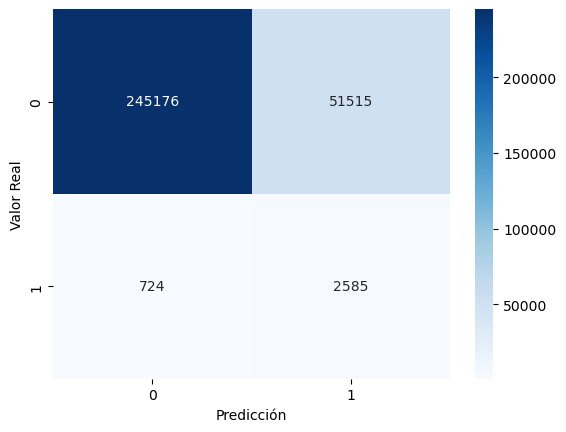

In [3]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que 'model' es tu regresión logística ya entrenada
# y 'X_test_scaled' y 'y_test' son tus datos de prueba
y_pred = model.predict(X_test_scaled)

# Genera la matriz
cm = confusion_matrix(y_test, y_pred)

# Visualízala
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

In [4]:
# Imprime un reporte completo
print(classification_report(y_test, y_pred, target_names=['No Fraude (0)', 'Fraude (1)']))

               precision    recall  f1-score   support

No Fraude (0)       1.00      0.83      0.90    296691
   Fraude (1)       0.05      0.78      0.09      3309

     accuracy                           0.83    300000
    macro avg       0.52      0.80      0.50    300000
 weighted avg       0.99      0.83      0.89    300000

